# Статистика, DS-поток
## Практическое задание 7


**Правила:**

* Дедлайн **26 октября 16:00**. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ad21_bot`.
* Прислать нужно ноутбук в формате `ipynb`.
* Решения, размещенные на каких-либо интернет-ресурсах не принимаются. Публикация решения может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качествие основы, ничего не удаляя из него.
* Никакой код из данного задания при проверке запускаться не будет.

**Баллы за задание:**

* Задача 1 &mdash; 7 баллов
* Задача 2 &mdash; 7 баллов
* Задача 3 &mdash; 10 баллов

**Важность задач:**

* *высокая:* задачи 1, 2;
* *обычная:* задача 3.

In [349]:
import numpy as np
import pandas as pd
import scipy.stats as sps
import plotly.graph_objects as go
import plotly.offline as pof

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(font_scale=1.3, style='whitegrid', palette='Set2')

__________________
## Задача 1.

Пусть $X_1, ..., X_n$ &mdash; выборка из условного распределения $\mathcal{N}(\theta, \sigma^2)$, $\theta \in \Theta = \mathbb{R}$ и $\theta$ в качестве априорного распределения имеет стандартное распределение Коши со сдвигом. 

Апостериорное распределение вычисляется по формуле:
$$q\left.(t\,\right|\,x) = \frac {q(t) p_t(x_1) ... p_t(x_n)} {\int\limits_\Theta q(t) p_t(x_1) ... p_t(x_n) dt},$$ 
где $p_t(x)$ &mdash; плотность распределения $\mathcal{N}(t, \sigma^2)$, а $q(t)$ &mdash; плотность распределения Коши.
Как было сказано на лекции, аналитически интеграл в знаменателе посчитать не удастся. Однако, этот интеграл можно вычислить численно, например, с помощью метода Монте-Карло.

В данном случае, интеграл $\int\limits_{\mathbb{R}} f(x) p(x) dx$, где $p(x)$ &mdash; некоторая плотность, можно оценить как  $\frac{1}{k}\sum\limits_{j=1}^k f(\xi_i)$, где $\xi_1, ..., \xi_k$ &mdash; сгенерированная выборка из распределения, имеющего плотность $p(x)$.

Рассмотрим столбец Alcalinity of ash датасета <a href="http://archive.ics.uci.edu/ml/datasets/Wine">о вине</a>. Постройте гистограмму этого признака. Похоже ли, что наше предпложение о его распределении верно?

Выберите параметры априорного распределения некоторым разумным способом, не опираясь на данные. Для этого рекомендуется поискать  информацию в других источниках и по ней сделать предположение о параметрах априорного распределения и $\sigma$. Объясните свой выбор. 

Для выборки, образованной столбцом Alcalinity of ash, посчитайте $c$ &mdash; знаменатель в формуле Байеса. Рассмотрите два подхода:

1. Посчитать исходный интеграл напрямую методом Монте-Карло.

2. Вычислить интеграл в знаменателе апостериорной плотности без учета константы нормального распределения, то есть посчитать следующий интеграл:
$$
\int\limits_\Theta q(t) \prod_{i=1}^n \widetilde{p}_t(x_i)dt,
$$
где $$\widetilde{p}_t(x) = \exp\left({-\frac{\left(x - t\right)^2}{2\sigma^2}}\right)$$
Константа из нормального распределения встречается и в числителе, поэтому, при подчете апостериорной плотности, мы можем ее заранее сократить.

Какой размер вспомогательной выборки в методе приближенного интегрирования необходим, чтобы с большой точностью посчитать значение $c$? 

Попробуйте применить оба описанных подхода. Выберите лучший и объясните свой выбор.

**Решение:**

In [350]:
data = pd.read_csv('wine.data')
data_first = data.columns.values
data = data.rename(columns={data_first[0]: 'Sort', data_first[1]: 'Alcohol',
                            data_first[2]: 'Malic acid', data_first[3]: 'Ash',
                            data_first[4]: 'Alcalinity of ash', data_first[5]: 'Magnesium',
                            data_first[6]: 'Total phenols', data_first[7]: 'Flavanoids',
                            data_first[8]: 'Nonflavanoid phenols', data_first[9]: 'Proanthocyanins',
                            data_first[10]: 'Color intensity', data_first[11]: 'Hue',
                            data_first[12]: 'OD280/OD315 of diluted wines', data_first[13]: 'Proline'})
data

,Sort,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
1,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
2,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
3,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
4,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
173,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
174,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
175,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [351]:
fig = go.Figure()
fig.add_trace(go.Histogram(x=data['Alcalinity of ash']))
fig.update_layout(title='Гистограмма признака Alcalinity of ash', 
                  xaxis_title="Alcalinity of ash", yaxis_title="$n$")
fig.show()
pof.plot(fig, filename='hist_aclan.html', auto_open=False)

'hist_aclan.html'

По гистограмме кажется, что "смахивает" на нормальное, но определенно точно сказать, что это нормальное мы не можем. Попробуем определить параметры. Будем опираться на выдержку из статьи, представленную ниже.
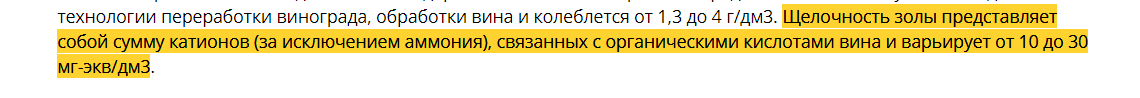 <br><br>
Возьмем сдвиг апостериорного распределения 20, а $\sigma$ найдем из условия, что отрезок $[10, 30]$ &mdash; это примерно интервал $(a - 2\sigma, a + 2\sigma),$ откуда $\sigma = 5,$ то есть, $\sigma^2 = 25.$

In [352]:
def integrate(f, t, X):
    return 1 / len(t) * np.sum(f(t, X))

In [353]:
normal_distr =  lambda t, X: np.prod(sps.norm(loc=t.reshape((1, len(t))), scale=sigma).pdf(X.reshape((len(X), 1))), axis=0)


a = 20
sigma = 5
n = int(1e5)

t = sps.cauchy(loc=a).rvs(size=n)
data_alcan = data["Alcalinity of ash"].to_numpy()
integral = integrate(normal_distr, t, data_alcan)
integral

9.998477766567834e-213

In [354]:
sqrt_2pisigma2 = np.sqrt(2 * np.pi * sigma ** 2)

def normal_distr_without_const(t, X):
    return np.prod(np.exp((t.reshape((1, len(t))) - X.reshape((len(X), 1))) ** 2 / (-2) / (sigma ** 2)), axis=0)

t = sps.cauchy(loc=a).rvs(size=n)
integral_without_const = integrate(normal_distr_without_const, t, data_alcan)
integral_without_const 

2.2745300333815784e-18

Позапускав несколько раз подсчет интегралов обоими методами для выборки $t$ размером $10^5,$ заметил, что относительная погрешность составляет в районе $5\%$ в первом методе и около $1\%$ во втором методе, хотя, казалось бы, скорость сходимости должна быть $\sqrt{n},$ исходя из теории. Мне кажется, что тут в дело вмешивается машинная точность, которая мешает с какого-то $n$ все более и более уточнять результат. Также стоит заметить, что у нас априорное распределение &mdash; это распределение Коши, у которого все совсем плохо со сходимостями, а метод Монте-Карло имеет вероятностный характер сходимости. Также, исходя из того, что у второго метода посчитанный знаменатель имеет более далекое от нуля значение, можно сделать вывод, что машинная точность меньше влияет на 2 метод, а, значит, скорее всего, он более точный.

Для апостериорного распределения, посчитанного по данной выборке одним из методов:
* нарисуйте график плотности;
* посчитайте и выпишите математическое ожидание;
* найдите симметричный (построенный по симметричным квантилям) 95%-ый доверительный интервал.

In [355]:
def a_posteriori_dencity(t, X):
    return sps.cauchy(loc=a).pdf(t) * normal_distr_without_const(t, X) / integral_without_const

grid_t = np.linspace(10, 30, 1001)
fig = go.Figure()
fig.add_trace(go.Scatter(x=grid_t, y=a_posteriori_dencity(grid_t, data_alcan), name='Апостериорная плотность'))
fig.update_layout(title='График апостериорной плотности', 
                  xaxis_title="$t$", yaxis_title="$q(t | X)$")
fig.show()
pof.plot(fig, filename='posteriori.html', auto_open=False)

'posteriori.html'

In [356]:
def find_math_expectation(f, low, high, n, **kwargs): 
    grid = np.linspace(low, high, n)
    length = (high - low) / n
    return np.sum(grid * f(grid, **kwargs)) * length

    
low = 18.3
high = 20.9

t_times_aposteriory = lambda t, X: t * a_posteriori_dencity(t, X)

def find_integral_by_rectangle(f, low, high, n, **kwargs):
    grid = np.linspace(low, high, n)
    length = (high - low) / n
    return np.sum(f(grid, **kwargs)) * length

E = find_math_expectation(a_posteriori_dencity, low, high, int(1e5), X=data_alcan)
print(f'математическое ожидание: {E}')

математическое ожидание: 19.475618985441308


In [357]:
alpha = 0.95

def cum_integral(f, low, high, n, **kwargs):
    grid = np.linspace(low, high, n)
    length = (high - low) / n
    return grid, np.cumsum(f(grid, **kwargs)) * length

i = cum_integral(a_posteriori_dencity, low, high, int(1e5), X=data_alcan)
i
def find_quantile(f, low, high, alpha, **kwargs):
    grid, cdf = cum_integral(f, low, high, int(1e5), **kwargs)
    return grid[np.where(cdf >= alpha)[0][0]]

def build_interval(f, low, high, alpha, **kwargs):
    return find_quantile(f, low, high, (1 - alpha) / 2, **kwargs), find_quantile(f, low, high, (1 + alpha) / 2, **kwargs)
interval = build_interval(a_posteriori_dencity, low, high, 0.95, X=data_alcan)
print(f'доверительный интервал уровня доверия {alpha} для параметра сдвига: {interval}')

доверительный интервал уровня доверия 0.95 для параметра сдвига: (18.900034000340003, 20.307038070380703)


Сделайте вывод о возможности применения метода Монте-Карло для нахождения константы апостериорного распределения. Какие преимущества и недостатки данного метода?

**Вывод:** как видно из полученных результатов, метод можно применять для данной задачи (по крайней мере, мы получили адекватные результаты). Однако стоит заметить, что константа апостериорного распределения сильно близка к нулю, поэтому на результат сильное влияние может оказать машинная точность. Плюс точность метода зависит от того, насколько нам "повезло" с данными, так как его сходимость носит случайный характер. Также этот метод требует больших вычислительных мощностей, чтоб брать интегралы. Из плюсов можно отметить то, что метод легко пишется и спокойно берет даже неберущиеся интегралы. 

__________________
## Задача 2.

Рассмотрим схему испытаний Бернулли (т.е. броски монет) с вероятностью успеха $p$. 

**1)** Постройте несколько графиков сопряженного распределения для разных параметров и **охарактеризуйте**, как его значения параметров соотносятся с априорными знаниями о монете.
Можно рассмотреть следующие случаи.
* Монета скорее честная. Тогда наиболее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес неизвестен. Тогда наименее вероятны значения $p$ в окрестности $0.5$.
* Монета скорее нечестная, перевес в сторону герба. Тогда наиболее вероятны значения $p$ в окрестности $1$.
* Монета скорее честная, либо с небольшим перекосом вправо. Тогда наиболее вероятны значения $p$ в окрестности $\approx 0.6$.
* Ничего не известно. Тогда все значения равновероятны.

Для каждого случая из перечисленных выше постройте график плотности сопряженного распределения (на одной фигуре).

Как мы выяснили в теор. д/з, сопряженным к распределению Бернулли является бета-распределение. Рассмотрим предложенные случаи.
* Монета скорее честная. Наиболее вероятны значения $p$ в окрестности $0.5$. Тогда возьмем за априорное распределение $Beta(2, 2).$
* Монета скорее нечестная, перевес неизвестен. Наименее вероятны значения $p$ в окрестности $0.5$. Тогда возьмем $Beta(0.5, 0.5).$
* Монета скорее нечестная, перевес в сторону герба. Наиболее вероятны значения $p$ в окрестности $1$. Тогда возьмем $Beta(11, 1).$
* Монета скорее честная, либо с небольшим перекосом вправо. Наиболее вероятны значения $p$ в окрестности $\approx 0.6$. Тогда возьмем $Beta(2.2, 1.8)$, у которого мода 0.6.
* Ничего не известно. Все значения равновероятны. Тогдав возьмем $Beta(1, 1),$ что является частным случаем равномерного на $[0, 1]$ распределения. 
<br> Построим графики, как и требовалось. Думаю, стоит оставить графики с помощью `plotly`, так как они более информативны.

In [358]:
grid = np.linspace(0, 1, 1001)

beta_params = np.array([(2, 2), (0.5, 0.5), (11, 1), (2.2, 1.8), (1, 1)])
fig = go.Figure()
for alpha, beta in beta_params:
    fig.add_trace(go.Scatter(x=grid, y=sps.beta(alpha, beta).pdf(grid), name=f'Beta({alpha}, {beta})'))

fig.update_layout(title='Графики априорных плотностей', 
                  xaxis_title="$x$", yaxis_title="$p_{Beta(\\alpha, \\beta)}(x)}$")
fig.update_yaxes(range=[0, 3])  
fig.show()
pof.plot(fig, filename='priori.html', auto_open=False)

'priori.html'

**Вывод:** исходя из априорных (доэкспериментальных) знаний, можно подбирать априорное распределение. Думаю, оно поэтому так и называется.

Ниже приведена реализация некоторых вспомогательных функций.

In [359]:
def draw_posteriori(grid, distr_class, post_params, xlim=None, ylim=None, s=''):
    '''
    Рисует серию графиков апостериорных плотностей.
    
    :param grid: сетка для построения графика
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    
    size = post_params.shape[0] - 1
    
    plt.figure(figsize=(12, 7))
    for n in range(size+1):
        plt.plot(grid, 
                 distr_class(post_params[n]).pdf(grid) \
                     if np.isscalar(post_params[n]) \
                     else distr_class(*post_params[n]).pdf(grid), 
                 label='n={}: {}'.format(n, np.round(post_params[n], 3)), 
                 lw=2.5,
                 color=(1-n/size, n/size, 0))
    plt.title(f'Апостериорное распределение в зависимости от размера выборки для априорного  \
    Beta({post_params[0][0]}, {post_params[0][1]}) с {s}правильно подобранными параметрами')
    plt.legend()
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.show()
    

def draw_estimations(ml, distr_class, post_params, confint=True, ylim=None, s='', p=0.5):
    '''
    Рисует графики байесовской оценки (м.о. и дов. инт.) и ОМП.
    :param ml: оценка максимального правдоподобия для 1 <= n <= len(sample)
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    
    size = len(ml)
    distrs = []
    for n in range(size+1): 
        distrs.append(distr_class(post_params[n]) \
                          if np.isscalar(post_params[n]) \
                          else distr_class(*post_params[n]))
    
    plt.figure(figsize=(12, 4))
    plt.plot(np.arange(size+1), [d.mean() for d in distrs], 
             label='Bayes', lw=2.5)
    plt.fill_between(np.arange(size+1), [d.ppf(0.975) for d in distrs], 
                     [d.ppf(0.025) for d in distrs], alpha=0.3)
    plt.plot(np.arange(size)+1, ml, label='MLE', lw=2.5)
    plt.plot(np.arange(size)+1, np.ones(size) * p, label='истинное значение p', lw=2.5)
    plt.title(f'Оценки параметра в зависимости от размера выборки с параметром p = {p} и {s}правильно подобранными параметрами')
    plt.xlabel('Размер выборки')
    plt.ylim(ylim)
    plt.legend()
    plt.show()

Реализуйте следующую функцию

In [360]:
def bern_posterior_params(sample, a, b):
    '''
    Находит параметры апостериорного распределения 
        для всех 0 <= n <= len(sample). 
    
    :param sample: выборка
    :param a: параметр alpha априорного распределения
    :param b: параметр beta априорного распределения
    
    :returns: параметры апостериорного
    '''
    n = np.linspace(0, len(sample), len(sample) + 1)
    k = np.concatenate([[0], np.cumsum(sample)])
    params = a + k, b + n - k
    return params

**2)** Проведите по 15 бросков симметричной и несимметричной монет (можно сгенерировать) и рассмотрите для каждой из них два случая — параметры априорного распределения подобраны правильно или неправильно.
Постройте графики, воспользовавшись функциями `draw_posteriori` и `draw_estimations`.

Для каждого из 5 случаев попробуем подобрать $p$ как моду априорного (случай, когда параметры априорного подобраны правильно; в случае, когда моды не существует, возьмем значение, у которого довольно большая плотность) и как отстоящий от оптимального на 0.4 (случай, когда параметры априорного подобраны неправильно).
* $Beta(2, 2) : p_1 = 0.5, p_2 = 0.1;$
* $Beta(0.5, 0.5): p_1 = 0.1, p_2 = 0.5;$
* $Beta(11, 1): p_1 = 0.9, p_2 = 0.5;$
* $Beta(2.2, 1.8): p_1 = 0.6, p_2 = 0.2;$
* $Beta(1, 1): p_1 = 0.5, p_2 = 0.9$ (тут вообще без разницы, какие значения брать). 

Также нам в задании надо изобразить оценку максимального правдоподобия, поэтому вспомним, что ОМП бернуллевской случайной величины &mdash; это $\frac{k}{n},$ где $k$ &mdash; количество единиц, а $n$ &mdash; размер выборки.

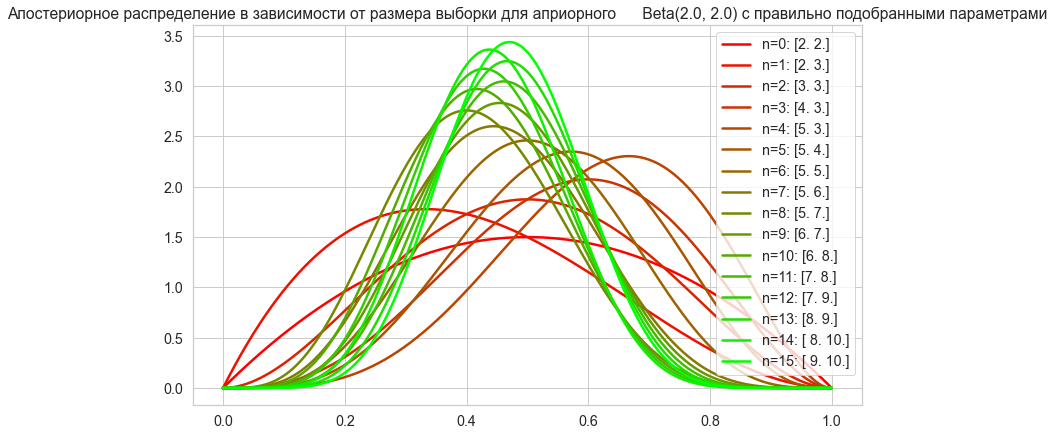

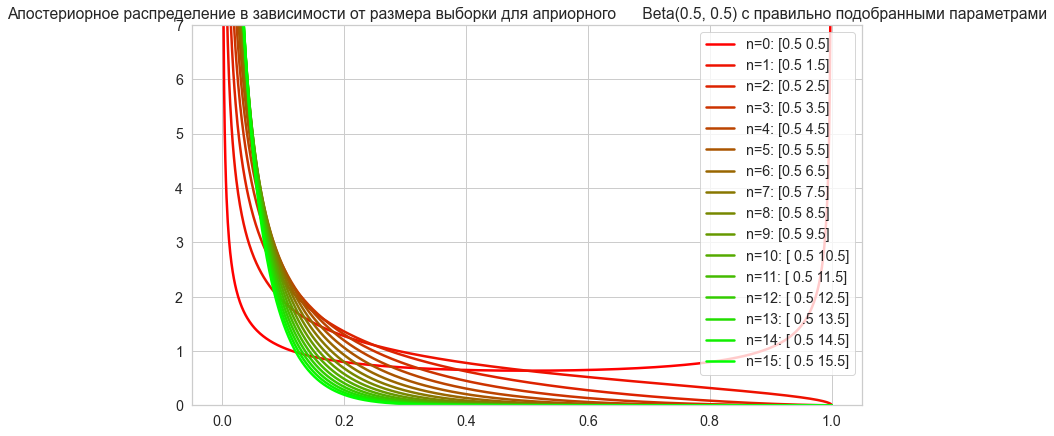

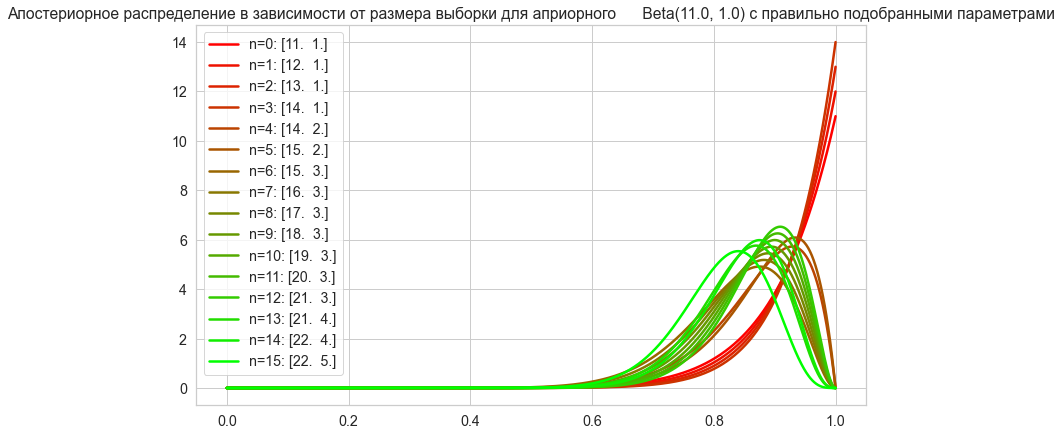

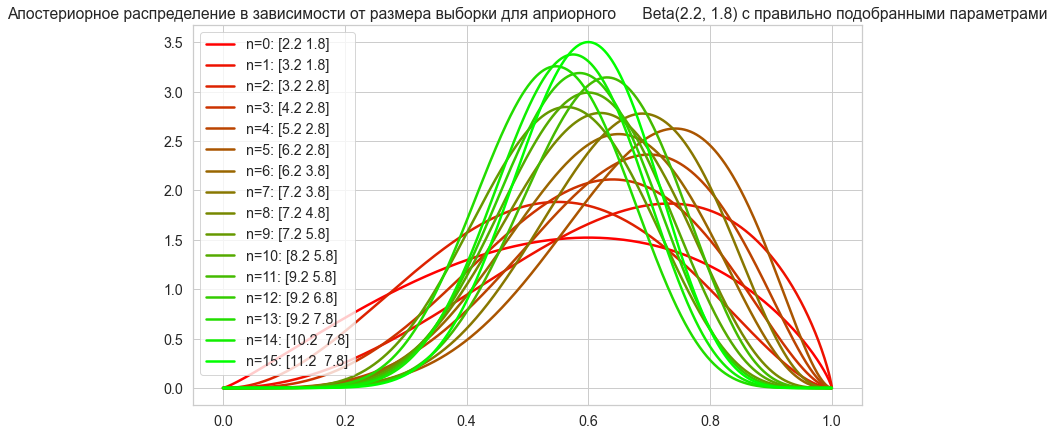

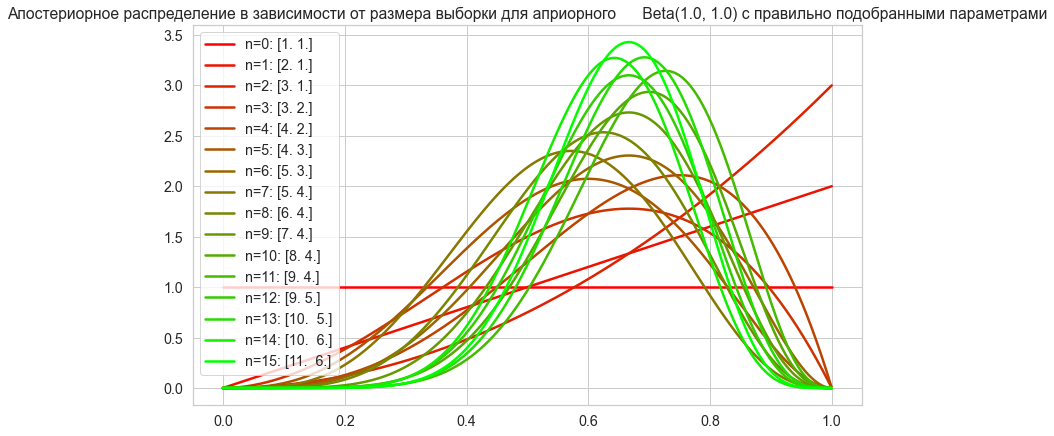

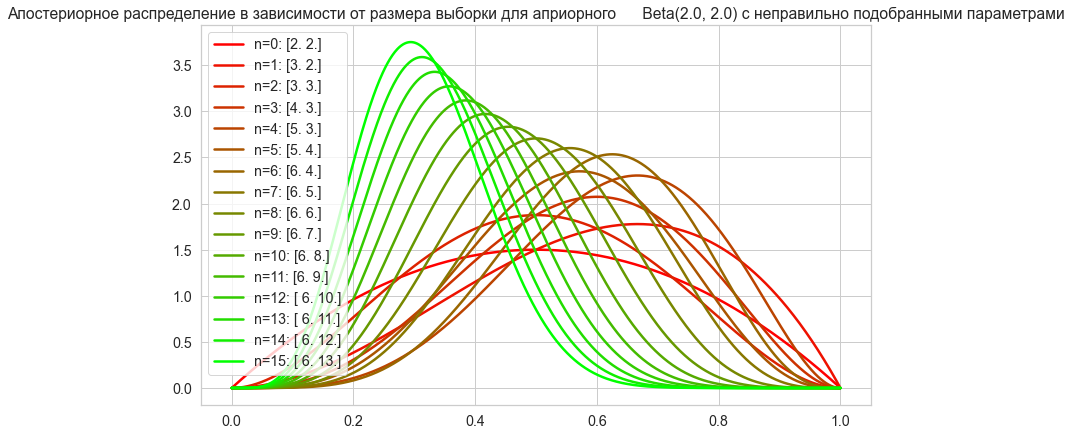

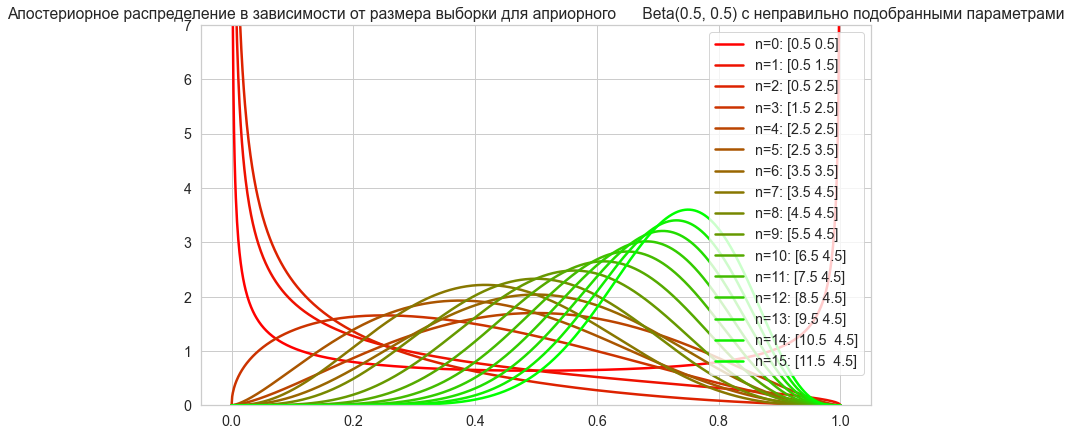

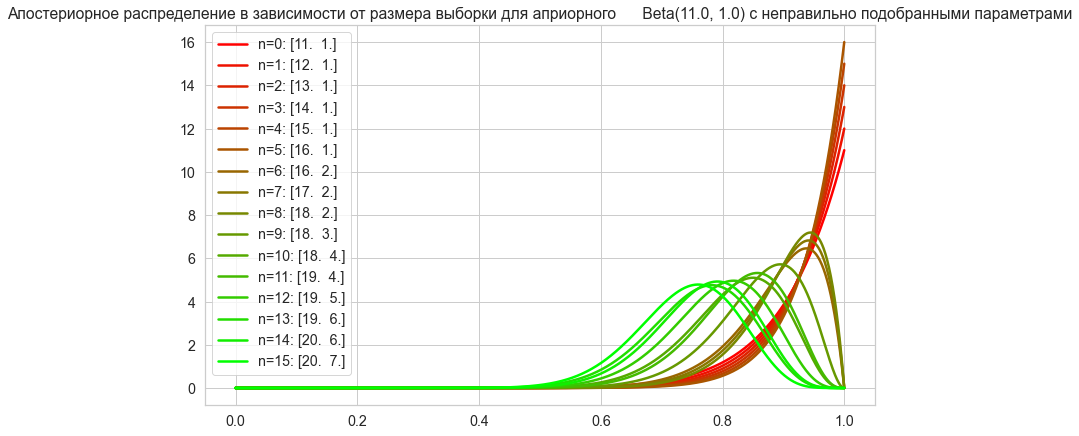

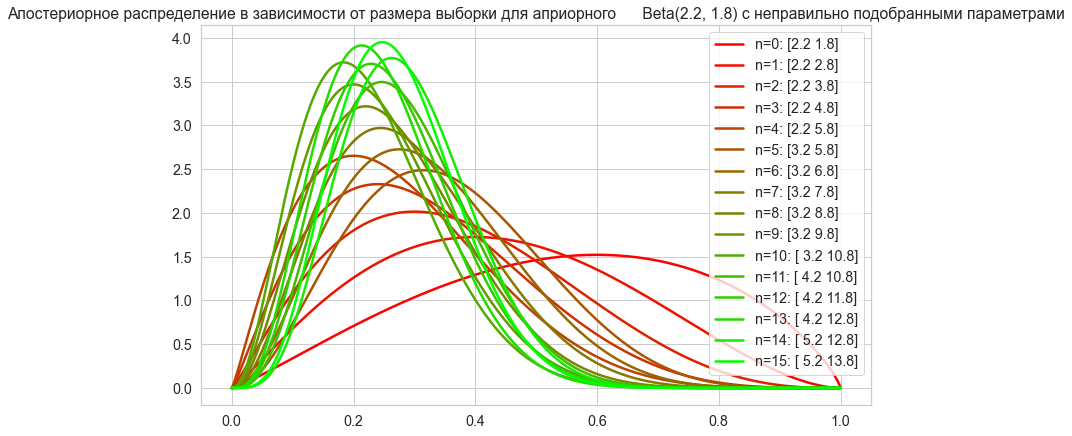

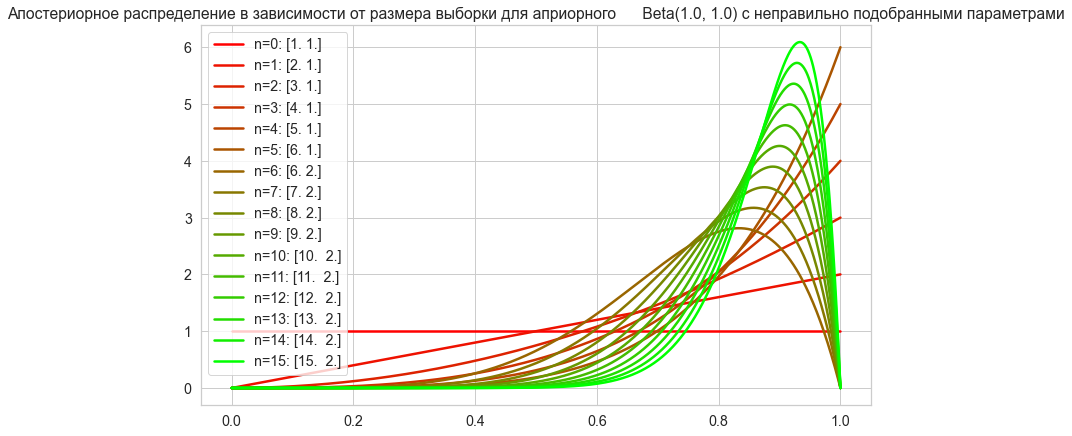

In [363]:
n = 15

p_true = np.array([0.5, 0.1, 0.9, 0.6, 0.5])
p_wrong = np.array([0.1, 0.5, 0.5, 0.2, 0.9])

alphas_true = np.array([np.zeros(n + 1)])
betas_true = np.array([np.zeros(n + 1)])
alphas_wrong = np.array([np.zeros(n + 1)])
betas_wrong = np.array([np.zeros(n + 1)])
for i, par in enumerate(beta_params):
    sample_true = sps.bernoulli(p_true[i]).rvs(size=n)
    params_true = bern_posterior_params(sample_true, par[0], par[1])
    alphas_true = np.append(alphas_true, [params_true[0]], axis=0)
    betas_true = np.append(betas_true, [params_true[1]], axis=0)
    
    sample_wrong = sps.bernoulli(p_wrong[i]).rvs(size=n)
    params_wrong = bern_posterior_params(sample_wrong, par[0], par[1])
    alphas_wrong = np.append(alphas_wrong, [params_wrong[0]], axis=0)
    betas_wrong = np.append(betas_wrong, [params_wrong[1]], axis=0)

alphas_true = alphas_true[1:]
betas_true = betas_true[1:]
alphas_wrong = alphas_wrong[1:]
betas_wrong = betas_wrong[1:]

grid = np.linspace(0, 1, 1001)
distr_class = sps.beta
for i in range(len(p_true)):
    post_params = np.array([alphas_true[i], betas_true[i]])
    if beta_params[i][0] == 0.5:
        ylim = [0, 7]
    else:
        ylim = None
    draw_posteriori(grid, distr_class, post_params.T, ylim=ylim)

for i in range(len(p_wrong)):
    post_params = np.array([alphas_wrong[i], betas_wrong[i]])
    if beta_params[i][0] == 0.5:
        ylim = [0, 7]
    else:
        ylim = None
    draw_posteriori(grid, distr_class, post_params.T, s='не', ylim=ylim)

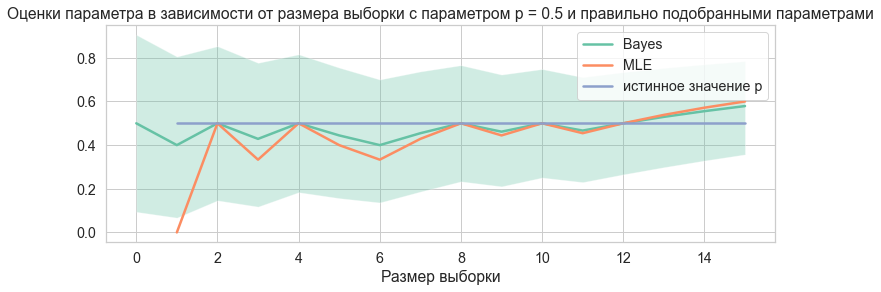

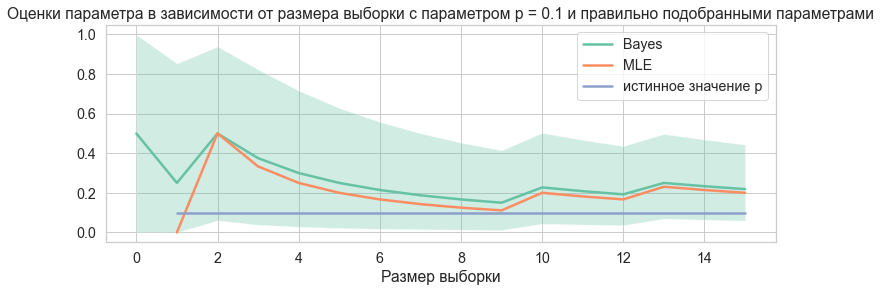

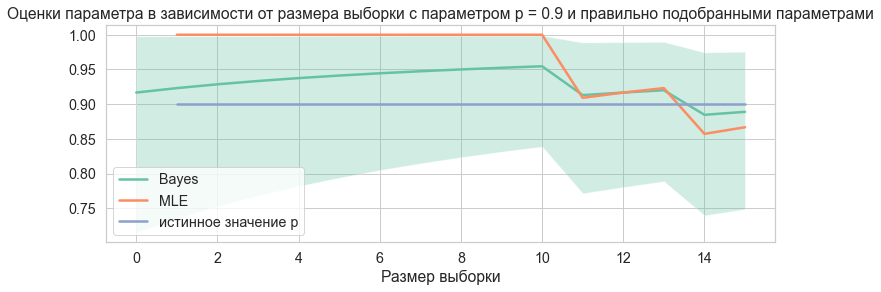

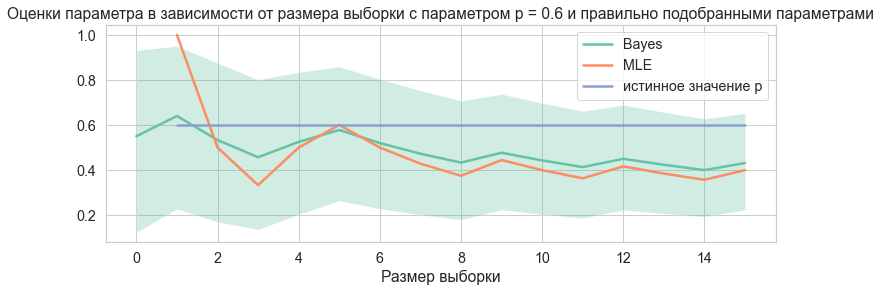

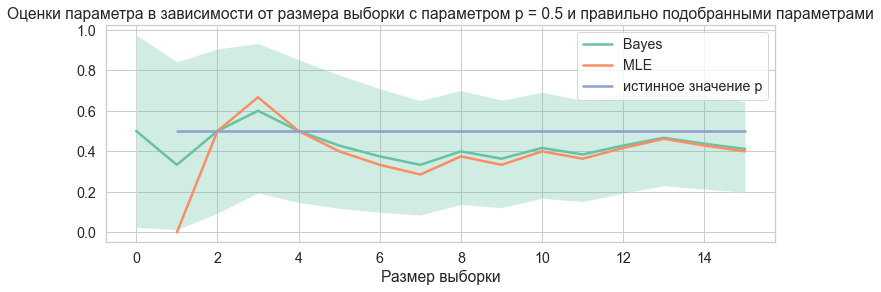

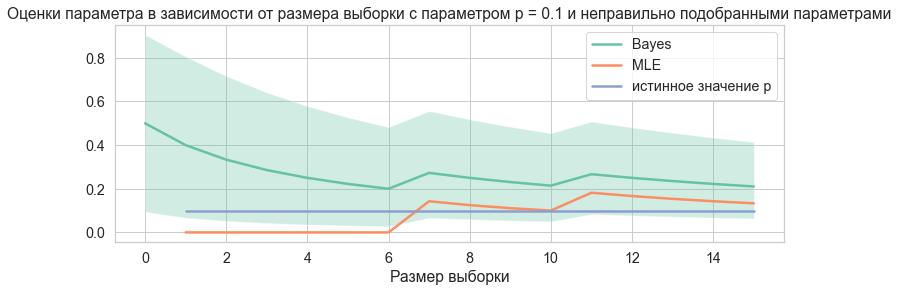

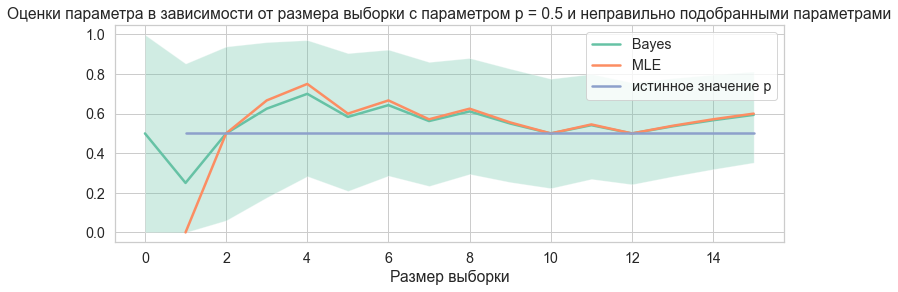

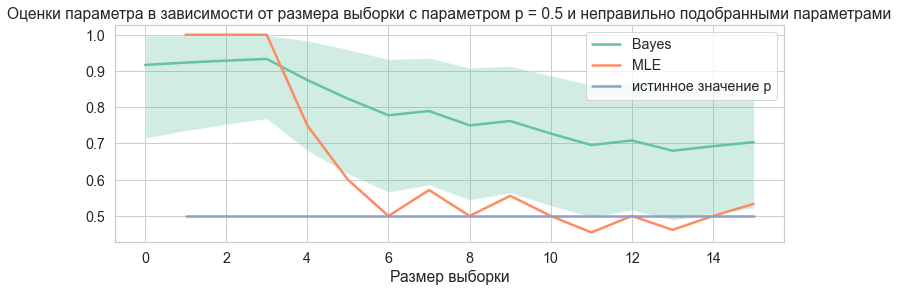

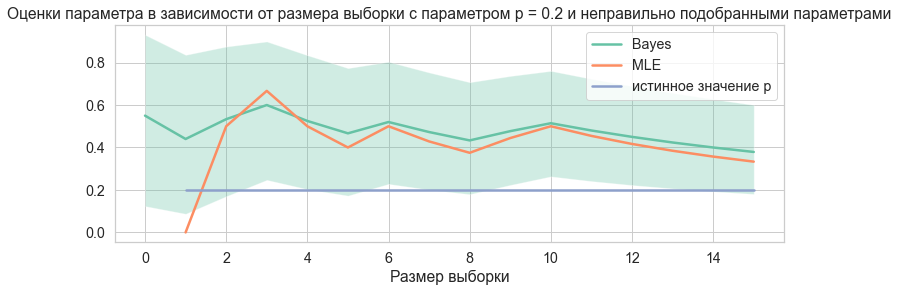

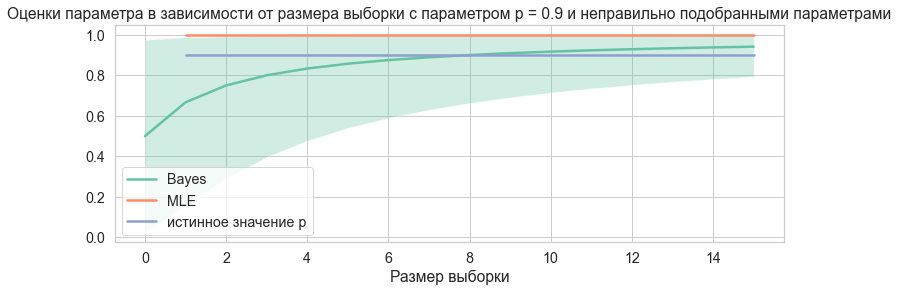

In [364]:
def find_ml(sample):
    n = np.linspace(1, len(sample), len(sample))
    k = np.cumsum(sample)
    return k / n




alphas_true = np.array([np.zeros(n + 1)])
betas_true = np.array([np.zeros(n + 1)])
alphas_wrong = np.array([np.zeros(n + 1)])
betas_wrong = np.array([np.zeros(n + 1)])
ml_true = np.array([np.zeros(n)])
ml_wrong = np.array([np.zeros(n)])

for i, par in enumerate(beta_params):
    sample_true = sps.bernoulli(p_true[i]).rvs(size=n)
    params_true = bern_posterior_params(sample_true, par[0], par[1])
    alphas_true = np.append(alphas_true, [params_true[0]], axis=0)
    betas_true = np.append(betas_true, [params_true[1]], axis=0)
    ml_true = np.append(ml_true, [find_ml(sample_true)], axis=0)
    
    sample_wrong = sps.bernoulli(p_wrong[i]).rvs(size=n)
    params_wrong = bern_posterior_params(sample_wrong, par[0], par[1])
    alphas_wrong = np.append(alphas_wrong, [params_wrong[0]], axis=0)
    betas_wrong = np.append(betas_wrong, [params_wrong[1]], axis=0)
    ml_wrong = np.append(ml_wrong, [find_ml(sample_wrong)], axis=0)
    

alphas_true = alphas_true[1:]
betas_true = betas_true[1:]
alphas_wrong = alphas_wrong[1:]
betas_wrong = betas_wrong[1:]
ml_true = ml_true[1:]
ml_wrong = ml_wrong[1:]

    
for i in range(len(p_true)):
    post_params = np.array([alphas_true[i], betas_true[i]])
    draw_estimations(ml_true[i], distr_class, post_params.T, p=p_true[i])

for i in range(len(p_wrong)):
    post_params = np.array([alphas_wrong[i], betas_wrong[i]])
    draw_estimations(ml_wrong[i], distr_class, post_params.T, s='не', p=p_wrong[i])

Сделайте вывод. Что можно сказать про зависимость от параметров априорного распределения? Сравните байесовские оценки с оценкой максимального правдоподобия параметра $p$. 

**Вывод:** если правильно подобрать параметры, то видно, что зачастую оценки `MLE` и `Bayes` сходятся почти сразу, в то время как при неправильно подобранных параметрах сходимость также есть, но оценки намного дальше друг от друга. Стоит также заметить, что часто при неправильно подобранных параметрах оценка `MLE` несколько ближе к реальному значению, чем `Bayes`, а при правильно подобранных параметрах зачастую ближе `Bayes`. При этом стоит отметить, что при большом размере выборки даже неправильно подобранные параметры позволяют достичь нужного результата, так как в апостериорном распределении информация об априорном распределении постепенно стирается с ростом выборки. Также ожидаемо, что при равномерном распределении (когда мы ничего не знаем) нет "правильных" и "неправильных" параметров: при значениях $p = 0.5$ и $p = 0.9$ оценки `Bayes` довольно быстро сошлись, то есть, логично, если нет никакой информации, сделать предположение, что априорное распределение равномерное.

__________________
## Задача 3.
 
В заключение вам предлагается творческая задача. Один экзаменатор на экзамене по математической статистике при выставлении оценки студенту пользуется следующей схемой. В течении экзамена экзаменатор задает студенту некоторое количество вопросов, получая тем самым выборку $X_1, ..., X_n \sim Bern(p)$ — индикаторы того, что студент на вопрос ответил правильно.
При этом сначала он подбирает некоторое априорное распределение на основе его знаний о студенте к моменту начала ответа. После каждого ответа студента экзаменатор вычисляет апостериорное распределение и строит байесовский доверительный интервал для $p$ уровня доверия 0.95. Если после очередного ответа студента доверительный интервал содержит лишь одно число $i/10$, где $i \in \{0, ..., 10\}$, то экзаменатор выставляет студенту оценку $\min(i+1, 10)$.

Ответьте на следующие вопросы:
* Квантили какого уровня нужно выбирать экзаменатору при построении доверительного интервала, чтобы задавать студенту как можно меньше вопросов? Какие оценки будет выставлять экзаменатор в таком случае?
* Как зависит оценка студента и среднее количество заданных вопросов у различных студентов (по уровню знаний) при различных априорных представлений экзаметора?
* Нужно ли дружить с таким экзаменатором?

Не ограничивайтесь только рассуждениями, не забывайте про визуализации.

Будем использовать в качестве априорного бета-распределение, так как оно сопряженное и с ним легче высчитывать апостериорное. Зафиксируем 4 случая: когда преподаватель думает, что:
* студент сильный &mdash; $Beta(25, 5);$
* студент средний &mdash; $Beta(10, 10);$
* студент слабый &mdash; $Beta(5, 25);$
* когда преподаватель ничего не знает о студенте &mdash; $Beta(1, 1).$

<br> Пусть также студент может быть:
* сильным, тогда он будет отвечать правильно с вероятностью $p = 0.8;$
* средним, тогда он будет отвечать правильно с вероятностью $p = 0.5;$
* слабым, тогда он будет отвечать правильно с вероятностью $p = 0.2.$

<br> Возьмем сетку $\alpha = (0, ..., 0.05)$ и посчитаем, сколько нужно вопросов в каждом из 12 случаев, чтобы в интервале $[U_{\alpha}, U_{\alpha + 0.95}]$ было только одно нужное число $\frac{i}{10}.$ Далее усредним количество вопросов и найдем, какого уровня должны быть квантили. Также не будем сильно мучать студентов и не будем им задавать больше 100 вопросов.

In [365]:
max_questions = 100

alpha_quantiles = np.linspace(0, 0.05, 51)
par_beta = np.array([(25, 5), (10, 10), (5, 25), (1, 1)])
p_arr = np.array([0.8, 0.5, 0.2])

question_arr = np.array([np.zeros(51)])
estimation_arr = np.array([np.zeros(51)])

for p in p_arr:
    sample = sps.bernoulli(p).rvs(max_questions)
    for par in par_beta:
        alpha_arr, beta_arr = bern_posterior_params(sample, par[0], par[1])
        question_from_alpha = np.array([])
        estimation_from_alpha = np.array([])
        for alpha_quantile in alpha_quantiles:
            u_a = 0
            u_b = 1
            questions = 0
            while int(10 * (u_b - u_a)) != 1 and questions <= max_questions:
                u_a = sps.beta(alpha_arr[questions], beta_arr[questions]).ppf(alpha_quantile)
                u_b = sps.beta(alpha_arr[questions], beta_arr[questions]).ppf(alpha_quantile + 0.95)
                questions += 1
            question_from_alpha = np.append(question_from_alpha, questions)
            if questions == 101:
                estimation_from_alpha = np.append(estimation_from_alpha, min(int(5 * (u_b - u_a)) + 1, 10))
            else:
                estimation_from_alpha = np.append(estimation_from_alpha, min(int(10 * u_b) + 1, 10))
        question_arr = np.append(question_arr, [question_from_alpha], axis=0)
        estimation_arr = np.append(estimation_arr, [estimation_from_alpha], axis=0)
        
question_arr = question_arr[1:]
estimation_arr = estimation_arr[1:]
question_arr[0]

array([101.,  75.,  62.,  58.,  56.,  54.,  52.,  49.,  47.,  46.,  45.,
        44.,  43.,  41.,  41.,  40.,  40.,  39.,  39.,  39.,  38.,  38.,
        38.,  29.,  29.,  29.,  26.,  26.,  26.,  26.,  26.,  26.,  26.,
        26.,  26.,  26.,  26.,  26.,  26.,  26.,  26.,  26.,  29.,  39.,
        39.,  40.,  41.,  44.,  45.,  53., 101.])

In [366]:
question_arr_avg = np.average(question_arr, axis=0)

argmin = np.argmin(question_arr_avg)
best_quantile = alpha_quantiles[argmin]
print(f'Квантили уровней ({best_quantile}, {best_quantile + 0.95}) нужно брать преподавателю, чтоб задавать как можно меньше \
вопросов студентам.')
print(f'При этом преподаватель будет задавать в среднем {int(question_arr_avg[argmin]) + 1} вопросов.')

Квантили уровней (0.026000000000000002, 0.976) нужно брать преподавателю, чтоб задавать как можно меньше вопросов студентам.
При этом преподаватель будет задавать в среднем 58 вопросов.


Какой-то дотошный получился экзаменатор, слишком много задает вопросов. Но давайте посмотрим, какие оценки он ставит. Посмотрим также на графики оценок студентов.

In [367]:
def draw_estimations(u_a, u_b, mean, params=np.array([1, 1]), opacity=0.1, 
                     color_interval='#FFFFFF', color_mean='#FFFFFF'):
    '''
    Рисует графики оценки студента (м.о. и дов. инт.).
    :param distr_class: класс распределений из scipy.stats
    :param post_params: параметры апостериорных распределений 
        shape=(размер выборки, кол-во параметров)
    '''
    N = len(u_a)
    t = np.linspace(1, N, N)
    t_rev = np.flip(t)
    u_b_rev = np.flip(u_b)
    fig.add_trace(go.Scatter(x=np.concatenate([t, t_rev]), y=np.concatenate([u_a, u_b_rev]), opacity=opacity,
                             fill='toself', fillcolor=color_interval, 
                             name=f'Интервал оценки студента для Beta{params}'))
    fig.add_trace(go.Scatter(x=t, y=mean, line_color=color_mean, mode='lines',
                                     name=f'Среднее значение оценки студента для Beta{params}'))
    return

alpha_quantile = best_quantile
estimation_arr = np.array([])
for p in p_arr:
    sample = sps.bernoulli(p).rvs(max_questions)
    fig = go.Figure()
    for i, par in enumerate(par_beta):
        alpha_arr, beta_arr = bern_posterior_params(sample, par[0], par[1])
        u_a = 0
        u_b = 1
        questions = 0
        u_a_arr = np.array([u_a])
        u_b_arr = np.array([u_b])
        mean_arr = np.array(0.5)
        while int(10 * (u_b - u_a)) != 1 and questions <= max_questions:
            u_a = sps.beta(alpha_arr[questions], beta_arr[questions]).ppf(alpha_quantile)
            u_b = sps.beta(alpha_arr[questions], beta_arr[questions]).ppf(alpha_quantile + 0.95)
            u_a_arr = np.append(u_a_arr, u_a)
            u_b_arr = np.append(u_b_arr, u_b)
            mean_arr = np.append(mean_arr, sps.beta(alpha_arr[questions], beta_arr[questions]).mean())
            questions += 1 
        if questions == 101:
            est = min(int(5 * (u_b - u_a)) + 1, 10)
        else:
            est = min(int(10 * u_b) + 1, 10)
        estimation_arr = np.append(estimation_arr, est)
        draw_estimations(u_a=10 * u_a_arr + 1, u_b=10 * u_b_arr + 1, mean=10 * mean_arr + 1, params=par, 
                         color_interval=f'#{2 + 2 * i}{2 + 2 * i}{2 * i}{2 * i}{8 - 2 * i}{8 - 2 * i}', 
                         color_mean=f'#{2 + 2 * i}{2 + 2 * i}{2 * i}{2 * i}{8 - 2 * i}{8 - 2 * i}')
        fig.add_trace(go.Scatter(x=np.array([questions + 1]), y=np.array([est]), mode='markers', 
                                 line_color=f'#88{3 * i}{3 * i}{9 - 3 * i}{9 - 3 * i}', 
                                 name=f'Полученная оценка при Beta{par}'))
    fig.update_layout(title=f'Зависимость оценки студента от мнения преподавателя, p = {p}', 
                      xaxis_title='questions', yaxis_title='estimation', plot_bgcolor = "white")
    fig.show()
    pof.plot(fig, filename=f'est_{p}.html', auto_open=False)

In [368]:
for n, est in enumerate(estimation_arr):
    i = n % 4
    j = n // 4
    print(f'Преподаватель задал априорное распределение: Beta{par_beta[i]}.')
    print(f'Студент отвечал на вопрос с вероятностью: p = {p_arr[j]}.')
    print(f'Студент получил оценку {est}.')

Преподаватель задал априорное распределение: Beta[25  5].
Студент отвечал на вопрос с вероятностью: p = 0.8.
Студент получил оценку 10.0.
Преподаватель задал априорное распределение: Beta[10 10].
Студент отвечал на вопрос с вероятностью: p = 0.8.
Студент получил оценку 9.0.
Преподаватель задал априорное распределение: Beta[ 5 25].
Студент отвечал на вопрос с вероятностью: p = 0.8.
Студент получил оценку 7.0.
Преподаватель задал априорное распределение: Beta[1 1].
Студент отвечал на вопрос с вероятностью: p = 0.8.
Студент получил оценку 10.0.
Преподаватель задал априорное распределение: Beta[25  5].
Студент отвечал на вопрос с вероятностью: p = 0.5.
Студент получил оценку 8.0.
Преподаватель задал априорное распределение: Beta[10 10].
Студент отвечал на вопрос с вероятностью: p = 0.5.
Студент получил оценку 7.0.
Преподаватель задал априорное распределение: Beta[ 5 25].
Студент отвечал на вопрос с вероятностью: p = 0.5.
Студент получил оценку 6.0.
Преподаватель задал априорное распределен

**Вывод:** как мы видим, оценки преподаватель ставит довольно адекватные, при этом его изначальное мнение (то есть, априорное распределение), конечно, влияет, но, скорее всего, если студент отвечает хорошо, то он получит хорошую оценку (параметры специально подобраны так, что оценки от априорного распределения зависят меньше, чем от знаний студента на экзамене; при желании параметры можно варьировать и менять значимость априорного мнения преподавателя и ответа студента). Также стоит отметить, что если преподаватель ничего не знает, то он оценивает согласно знаниям студентов, что логично. Конечно, с таким преподавателем стоит дружить, чтоб иметь возможность получить оценку чуть выше знаний, однако на экзамен к такому преподавателю я бы не хотел попадать: засыпет вопросами :) 